In [368]:
import numpy as np
import sys
import lu
import matplotlib.pyplot as plt

x =  [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
y =  [-2.2026, -0.19315, 0.79464, 1.5624, 2.2306, 2.8419]
Первой степени
(6.0a0)+(6.6a1)=5.03379
(6.6a0)+(10.06a1)=12.189471000000001
Значение функции в y: [-1.5368571428571425, -0.5865282857142855, 0.3638005714285715, 1.3141294285714284, 2.2644582857142854, 3.2147871428571424]
F1(x) = -1.7744393571428567 + (2.3758221428571424x^1) 
(F-y)^2 = 0.9854121221771428

Второй степени
(6.0a0)+(6.6a1)+(10.06a2)=5.03379
(6.6a0)+(10.06a1)+(17.226a2)=12.189471000000001
(10.06a0)+(17.226a1)+(31.375000000000004a2)=22.193013899999997
Значение функции в y:  [-2.029066071428557, -0.48808650000000064, 0.7575677142857058, 1.7078965714285623, 2.362900071428567, 2.722578214285723]
F2(x) = -2.4604555513392667 + (4.406183973214236x^1) + (-0.9228917410714071x^2) 
(F-y)^2 = 0.17138616750928573



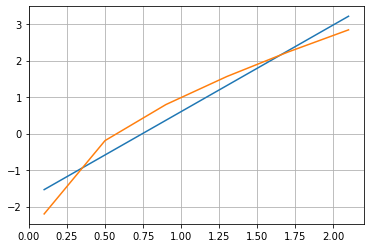

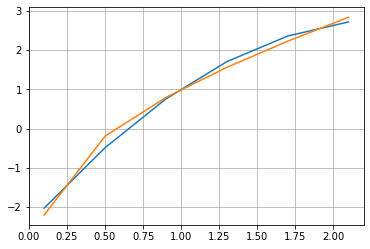

In [387]:
def get_system(x,y,N):
    x = np.array(x)
    y = np.array(y)
    N += 1
    n = x.size
    A = np.zeros((N,N))
    B = np.zeros((N,1))
    for i in range(N):
        B[i] = np.sum(y*x**i)
        A[i,:] = [np.sum(x**(i+j)) for j in range(N)]
        if i == 0:
            A[0,0] = n
    return A,B


def print_system(A,B):
    A = A.astype(str)
    B = B.astype(str)
    A1 = []
    n = A[0].size
    for i in range(n):
        B[i] = str(B[i,0])
        A[i,:] = ["("+A[i,j]+"a"+str(j)+")" for j in range(n)]
        print("+".join(A[i,:])+"="+B[i,0])

        
def print_equation(x):
    n = len(x)
    res = "F"+str(n-1)+str("(x)")+" = "
    for i in range(n):
        if i == 0:
             res+=str(x[0])+" "
        else:
            res+="+ ("+str(x[i])+"x^"+str(i)+") "
    print(res)


def get_value(x,a):
    n = len(a)
    res = 0
    for i in range(n):
        res += x**i*a[i]
    return res

def get_deviation(x,y,a):
    n = len(x)
    res = 0
    for i in range(n):
        res += (get_value(x[i],a)-y[i])**2
    return res


def plot(x,y):
    fig, ax = plt.subplots()
    ax.plot(x,y)


def main():
    x = [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
    y = [-2.2026, -0.19315, 0.79464, 1.5624, 2.2306, 2.8419]
    n = len(x)
    print("x = ", x)
    print("y = ", y)
    print("Первой степени")
    A,B = get_system(x,y,1)
    print_system(A,B)
    a = lu.solve(A,B)
    y_new = [get_value(x[i],a) for i in range(n)]
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x,y_new)
    ax.plot(x,y)
    print("Значение функции в y:", y_new)
    print_equation(a)
    print("(F-y)^2 = " + str(get_deviation(x,y,a))+"\n")
    print("Второй степени")
    A,B = get_system(x,y,2)
    print_system(A,B)
    a = lu.solve(A,B)
    y_new = [get_value(x[i],a) for i in range(n)]
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x,y_new)
    ax.plot(x,y)
    print("Значение функции в y: ", y_new)
    print_equation(a)
    print("(F-y)^2 = " + str(get_deviation(x,y,a))+"\n")

    

    
if  __name__ == "__main__":
    main()
